In [5]:
pip install tensorflow

In [6]:
# Cell 1: Mount Google Drive (Run this FIRST)
from google.colab import drive
drive.mount('/content/drive')

# You will be prompted to click a link, sign in, and paste an authorization code.
# Once successfully mounted, you'll see "Mounted at /content/drive".
# Cell 2: Data Loading and Unzipping Code

from pathlib import Path
import zipfile
import os
import pandas as pd # Keep if you might use it, otherwise can remove

# --- Define Paths to Zipped Data in Google Drive ---
# This is the CORRECT path to your 'classification-data' folder in Google Drive
data_dir_gdrive = Path('/content/drive/MyDrive/classification-data')

train_zip_path = data_dir_gdrive / 'train.zip'
test_zip_path = data_dir_gdrive / 'test.zip'

print(f"Looking for train.zip at: {train_zip_path}")
print(f"Looking for test.zip at: {test_zip_path}")

# --- Create directories for extracted data (on Colab's local disk) ---
extracted_data_base_dir_colab = Path('/content/extracted_data') # Extract to Colab's local storage for speed

# These will be the initial folders created by the unzipping process
# Based on your output, train.zip extracts into 'train/' and test.zip into 'test/'
# So the images will be in /content/extracted_data/train/train/ and /content/extracted_data/test/test/
extracted_train_root = extracted_data_base_dir_colab / 'train'
extracted_test_root = extracted_data_base_dir_colab / 'test'

extracted_train_root.mkdir(parents=True, exist_ok=True)
extracted_test_root.mkdir(parents=True, exist_ok=True)

print(f"\nExtracted train data will go to: {extracted_train_root}")
print(f"Extracted test data will go to: {extracted_test_root}")

# --- Unzip the files ---

if train_zip_path.exists():
    print(f"\nUnzipping {train_zip_path}...")
    try:
        with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
            zip_ref.extractall(extracted_train_root)
        print(f"Successfully unzipped train.zip to {extracted_train_root}")
    except zipfile.BadZipFile:
        print(f"Error: {train_zip_path} is not a valid ZIP file.")
    except Exception as e:
        print(f"An error occurred while unzipping train.zip: {e}")
else:
    print(f"\nError: train.zip not found at {train_zip_path}. Please check the path.")

if test_zip_path.exists():
    print(f"\nUnzipping {test_zip_path}...")
    try:
        with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
            zip_ref.extractall(extracted_test_root)
        print(f"Successfully unzipped test.zip to {extracted_test_root}")
    except zipfile.BadZipFile:
        print(f"Error: {test_zip_path} is not a valid ZIP file.")
    except Exception as e:
        print(f"An error occurred while unzipping test.zip: {e}")
else:
    print(f"\nError: test.zip not found at {test_zip_path}. Please check the path.")


# --- Verification: List contents of initial extracted directories ---
print(f"\nContents of extracted train directory ({extracted_train_root}):")
if extracted_train_root.exists() and extracted_train_root.is_dir():
    contents = list(extracted_train_root.iterdir())
    if contents:
        for item in contents:
            print(f"- {item.name}")
    else:
        print("Extracted train directory is empty.")
else:
    print("Extracted train directory does not exist or is not a directory.")


print(f"\nContents of extracted test directory ({extracted_test_root}):")
if extracted_test_root.exists() and extracted_test_root.is_dir():
    contents = list(extracted_test_root.iterdir())
    if contents:
        for item in contents:
            print(f"- {item.name}")
    else:
        print("Extracted test directory is empty.")
else:
    print("Extracted test directory does not exist or is not a directory.")
# Cell 3: Restructure Data into 'cats' and 'dogs' Subfolders (Corrected)

import os
import shutil
from pathlib import Path

# --- Define the ACTUAL base paths where images are after unzipping ---
# Based on your output, train.zip extracts into 'train/' and test.zip into 'test/'
# So the images are in /content/extracted_data/train/train/ and /content/extracted_data/test/test/
# These are the paths that contain the actual image files (e.g., cat.0.jpg, dog.0.jpg)
train_images_source_path = Path('/content/extracted_data') / 'train' / 'train'
test_images_source_path = Path('/content/extracted_data') / 'test' / 'test'

print("Restructuring extracted data into 'cats' and 'dogs' subfolders...")

def organize_images_by_class(base_path):
    if not base_path.exists():
        print(f"Warning: Base path for images '{base_path}' does not exist. Skipping organization.")
        return

    cats_dir = base_path / 'cats'
    dogs_dir = base_path / 'dogs'
    cats_dir.mkdir(exist_ok=True)
    dogs_dir.mkdir(exist_ok=True)
    print(f"Created subdirectories: {cats_dir} and {dogs_dir}")

    print(f"\nAttempting to organize images in: {base_path}")

    files_found = []
    for item in os.listdir(base_path):
        item_path = base_path / item
        if item_path.is_file(): # Only consider actual files
            files_found.append(item)

    if not files_found:
        print(f"No image files found directly in '{base_path}'. This means restructuring won't move anything.")
        return

    print(f"Found {len(files_found)} files in '{base_path}'. First 5 files: {files_found[:5]}")

    moved_count = 0
    for filename in files_found:
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            source_path = base_path / filename
            if filename.lower().startswith('cat'):
                shutil.move(source_path, cats_dir / filename)
                moved_count += 1
            elif filename.lower().startswith('dog'):
                shutil.move(source_path, dogs_dir / filename)
                moved_count += 1
    print(f"Finished organizing images in: {base_path}. Moved {moved_count} files.")

# Organize both train and test directories (using the *corrected* source paths)
organize_images_by_class(train_images_source_path)
organize_images_by_class(test_images_source_path)
print("\nData restructuring complete. You should now have 'cats' and 'dogs' subfolders with files in them.")

# --- Verification: List contents of newly created class folders ---
print("\n--- Verifying contents of new class folders ---")

def verify_class_folder_contents(base_path):
    cats_dir = base_path / 'cats'
    dogs_dir = base_path / 'dogs'

    print(f"Contents of {cats_dir}:")
    if cats_dir.exists():
        cat_files = list(cats_dir.iterdir())
        if cat_files:
            for item in cat_files[:5]:
                print(f"- {item.name}")
            print(f"...and {len(cat_files)-5} more files.")
        else:
            print("  (Empty)")
    else:
        print("  (Directory does not exist)")

    print(f"Contents of {dogs_dir}:")
    if dogs_dir.exists():
        dog_files = list(dogs_dir.iterdir())
        if dog_files:
            for item in dog_files[:5]:
                print(f"- {item.name}")
            print(f"...and {len(dog_files)-5} more files.")
        else:
            print("  (Empty)")
    else:
        print("  (Directory does not exist)")

verify_class_folder_contents(train_images_source_path)
verify_class_folder_contents(test_images_source_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking for train.zip at: /content/drive/MyDrive/classification-data/train.zip
Looking for test.zip at: /content/drive/MyDrive/classification-data/test.zip

Extracted train data will go to: /content/extracted_data/train
Extracted test data will go to: /content/extracted_data/test

Unzipping /content/drive/MyDrive/classification-data/train.zip...
Successfully unzipped train.zip to /content/extracted_data/train

Unzipping /content/drive/MyDrive/classification-data/test.zip...
Successfully unzipped test.zip to /content/extracted_data/test

Contents of extracted train directory (/content/extracted_data/train):
- train

Contents of extracted test directory (/content/extracted_data/test):
- test
Restructuring extracted data into 'cats' and 'dogs' subfolders...
Created subdirectories: /content/extracted_data/train/train/cats and /content/extracted_data/train/train/d

In [ ]:
# Cell 4: CNN Model Definition, Training, Evaluation, and Prediction

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import os
from pathlib import Path
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# --- IMPORTANT: Define the FINAL paths to your image data ---
# These paths point to the directories that *will contain* the 'cats' and 'dogs' subfolders
# for the training data (after Cell 3 runs).
# For the test data, it points to the directory containing the *unlabeled* images directly.

# Path to the base directory for LABELED training images (where 'cats' and 'dogs' subfolders will be)
train_labeled_base_dir = Path('/content/extracted_data') / 'train' / 'train'

# Path to the base directory for UNLABELED test images (where images like '894.jpg' are directly)
test_unlabeled_base_dir = Path('/content/extracted_data') / 'test' / 'test'

train_labeled_base_dir_str = str(train_labeled_base_dir)
test_unlabeled_base_dir_str = str(test_unlabeled_base_dir)

# Define image dimensions and batch size
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

# --- 1. Data Generators ---
print("Setting up ImageDataGenerators...")

# Data generator for TRAINING (with augmentation and validation split)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 # Use 20% of the training data for validation
)

# Data generator for making predictions on the *unlabeled* test set
# No augmentation, just rescaling. class_mode=None means it will yield only image data (no labels).
test_prediction_datagen = ImageDataGenerator(rescale=1./255)


print(f"Loading training images from: {train_labeled_base_dir_str}")
train_generator = train_datagen.flow_from_directory(
    train_labeled_base_dir_str,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary', # Expects 'cats' and 'dogs' subfolders
    subset='training',   # Get the training subset
    shuffle=True
)

print(f"Loading validation images from: {train_labeled_base_dir_str}")
validation_generator = train_datagen.flow_from_directory( # Use the same train_datagen for validation split
    train_labeled_base_dir_str,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary', # Expects 'cats' and 'dogs' subfolders
    subset='validation', # Get the validation subset
    shuffle=False # No need to shuffle validation data for consistent evaluation
)

print(f"Loading unlabeled test images from: {test_unlabeled_base_dir_str}")
unlabeled_test_generator = test_prediction_datagen.flow_from_directory(
    test_unlabeled_base_dir_str,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode=None, # IMPORTANT: No labels for this generator, as test images are unlabeled
    shuffle=False # Keep order for potential submission/inspection
)
print("Data generators initialized.")

# --- 2. Build the CNN Model ---
print("\nBuilding the CNN model architecture...")
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dropout(0.5),

    Dense(512, activation='relu'),

    Dense(1, activation='sigmoid')
])

# --- 3. Compile the Model ---
print("Compiling the model...")
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# --- 4. Train the Model ---
print("\nStarting model training...")
# Train using train_generator and validate using validation_generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator, # Use the dedicated validation generator
    validation_steps=validation_generator.samples // BATCH_SIZE
)
print("Model training completed.")

# --- 5. Evaluate and save the Model ---
# We evaluate on the validation set (a split of the labeled training data)
print("\nEvaluating the model on validation data...")
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // BATCH_SIZE)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")
model.save('dog_vs_cat_classifier.h5')
print("\nModel saved as 'dog_vs_cat_classifier.h5'")

# --- VISUALIZATIONS ---
print("\nGenerating visualizations...")

# Plot Training & Validation Accuracy Values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Training & Validation Loss Values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Generate Confusion Matrix for the VALIDATION SET (since test is unlabeled)
print("\nGenerating Confusion Matrix for Validation Set...")

validation_generator.reset() # Reset validation generator for consistent predictions
val_predictions = model.predict(validation_generator, steps=None, verbose=1)
val_predicted_classes = (val_predictions > 0.5).astype(int).flatten()

val_true_classes = validation_generator.classes
# Use class_indices from the training generator, as it defines the mapping
class_labels = list(train_generator.class_indices.keys()) # This will correctly be ['cats', 'dogs']

cm = confusion_matrix(val_true_classes, val_predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report (Validation Set):")
print(classification_report(val_true_classes, val_predicted_classes, target_names=class_labels))

# --- END VISUALIZATIONS ---


# --- 6. Making Predictions (Example Function) ---
#


Generating visualizations...


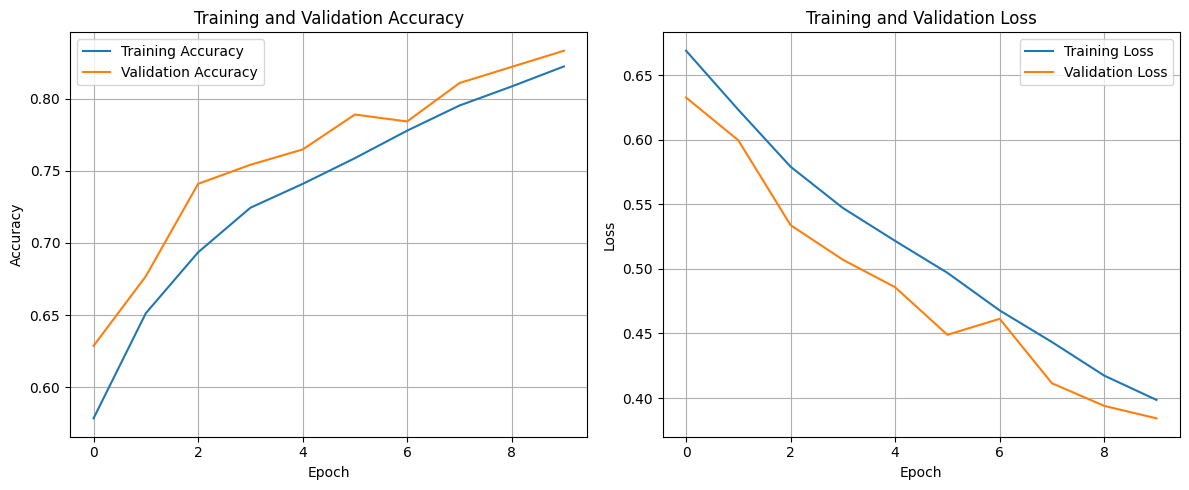


Generating Confusion Matrix for Validation Set...


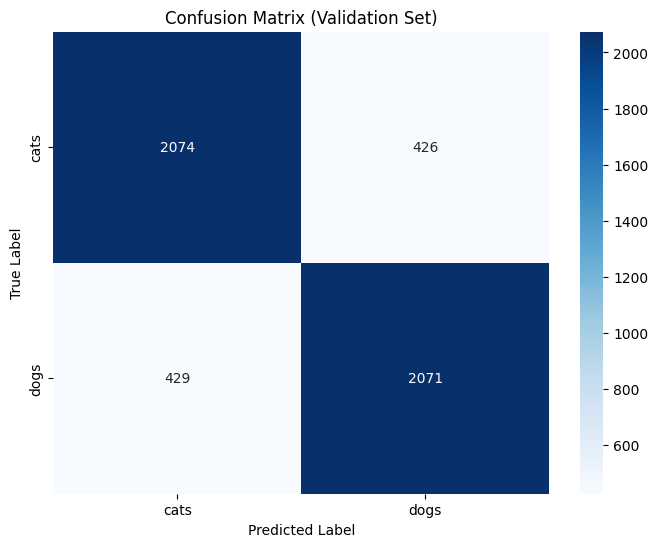


Classification Report (Validation Set):
              precision    recall  f1-score   support

        cats       0.83      0.83      0.83      2500
        dogs       0.83      0.83      0.83      2500

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000


--- Interactive Image Classifier ---
Enter the filename of an image (e.g., 'cat.901.jpg' or '894.jpg').
The model will search for it in your 'train' (labeled) or 'test' (unlabeled) extracted data folders.
Type 'quit' to exit.
Prediction: Dog (87.71%)
Prediction: Cat (85.36%)
Prediction: Dog (97.56%)
Prediction: Dog (67.66%)
Prediction: Dog (65.59%)
Filename cannot be empty. Please enter a filename or 'quit'.
Prediction: Dog (97.61%)
Prediction: Dog (96.90%)
Prediction: Dog (87.68%)
Prediction: Dog (90.93%)
Prediction: Dog (53.00%)
Prediction: Cat (95.10%)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # For confusion matrix heatmap
from sklearn.metrics import confusion_matrix, classification_report # For confusion matrix and report

# Ensure these variables are accessible from the previous cell (Cell 4)
# history, model, val_true_classes, val_predicted_classes, class_labels
# train_labeled_base_dir, test_unlabeled_base_dir, IMG_WIDTH, IMG_HEIGHT

# --- NEW SECTION: VISUALIZATIONS ---
print("\nGenerating visualizations...")

# Plot Training & Validation Accuracy Values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Training & Validation Loss Values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Generate Confusion Matrix for the VALIDATION SET (since test is unlabeled)
print("\nGenerating Confusion Matrix for Validation Set...")

# val_true_classes, val_predicted_classes, and class_labels are already defined in Cell 4
cm = confusion_matrix(val_true_classes, val_predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report (Validation Set):")
print(classification_report(val_true_classes, val_predicted_classes, target_names=class_labels))

# --- END VISUALIZATIONS ---


# --- 6. Making Predictions (Example Function) ---
# This function is the one from the end of the previous Cell 4, which correctly
# handles both labeled (train) and unlabeled (test) image paths.
def predict_image(filename):
    """
    Loads an image from the given filename (e.g., 'cat.123.jpg' or '894.jpg'),
    infers its likely location within the train or unlabeled test directories,
    preprocesses it, and makes a prediction (Dog or Cat) using the trained CNN model.
    Returns a tuple: (predicted_label_string, confidence_percentage)
    """
    final_image_path = None

    # First, try to find the image in the LABELED training data
    # This assumes train images have 'cat'/'dog' prefixes and are in subfolders
    if filename.lower().startswith('cat'):
        class_subdir = 'cats'
        potential_path = train_labeled_base_dir / class_subdir / filename
        if potential_path.exists():
            final_image_path = potential_path
    elif filename.lower().startswith('dog'):
        class_subdir = 'dogs'
        potential_path = train_labeled_base_dir / class_subdir / filename
        if potential_path.exists():
            final_image_path = potential_path

    # If not found in labeled train, try the UNLABELED test directory directly
    if final_image_path is None:
        potential_path = test_unlabeled_base_dir / filename
        if potential_path.exists():
            final_image_path = potential_path
        else:
            return (f"Error: Image file '{filename}' not found in labeled train "
                    f"({train_labeled_base_dir}) nor unlabeled test ({test_unlabeled_base_dir}). "
                    "Please check filename and ensure it's in your extracted data.", 0.0)

    try:
        # Import image here to ensure it's available, though it should be global from Cell 4
        from tensorflow.keras.preprocessing import image
        img = image.load_img(final_image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        prediction = model.predict(img_array, verbose=0)

        if prediction[0] > 0.5:
            label = "Dog"
            confidence = prediction[0][0] * 100
        else:
            label = "Cat"
            confidence = (1 - prediction[0][0]) * 100
        return label, confidence
    except Exception as e:
        return f"Error processing image: {e}", 0.0

# --- NEW SECTION: INTERACTIVE PREDICTION LOOP ---
print("\n--- Interactive Image Classifier ---")
print("Enter the filename of an image (e.g., 'cat.901.jpg' or '894.jpg').")
print("The model will search for it in your 'train' (labeled) or 'test' (unlabeled) extracted data folders.")
print("Type 'quit' to exit.")

while True:
    filename_input = input("\nEnter filename: ").strip()

    if filename_input.lower() == 'quit':
        print("Exiting interactive classifier.")
        break
    elif not filename_input:
        print("Filename cannot be empty. Please enter a filename or 'quit'.")
        continue

    label, confidence = predict_image(filename_input)

    if "Error" in label:
        print(label)
    else:
        print(f"Prediction: {label} ({confidence:.2f}%)")

# --- END INTERACTIVE PREDICTION LOOP ---